In [11]:
pip install scikit-learn

In [12]:
pip install pyswarms

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score
import numpy as np
import pyswarms as ps
from sklearn.svm import SVC

In [14]:
data = pd.read_csv('/content/EEG_data.csv')

print (data.columns)
print (data)

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln'],
      dtype='object')
       SubjectID  VideoID  Attention  Mediation    Raw      Delta      Theta  \
0            0.0      0.0       56.0       43.0  278.0   301963.0    90612.0   
1            0.0      0.0       40.0       35.0  -50.0    73787.0    28083.0   
2            0.0      0.0       47.0       48.0  101.0   758353.0   383745.0   
3            0.0      0.0       47.0       57.0   -5.0  2012240.0   129350.0   
4            0.0      0.0       44.0       53.0   -8.0  1005145.0   354328.0   
...          ...      ...        ...        ...    ...        ...        ...   
12806        9.0      9.0       64.0       38.0  -39.0   127574.0     9951.0   
12807        9.0      9.0       61.0       35.0 -275.0   323061.0   797464.0   
12808        9.0      9.0       60.0       29.0 -426.0   68098

In [15]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
X = data.drop('Alpha1', axis=1)  # Features
y = data['Alpha2']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
data['Timestamp'] = pd.to_datetime(data.index/1000, unit='s')

print (data)

       SubjectID  VideoID  Attention  Mediation    Raw      Delta      Theta  \
0            0.0      0.0       56.0       43.0  278.0   301963.0    90612.0   
1            0.0      0.0       40.0       35.0  -50.0    73787.0    28083.0   
2            0.0      0.0       47.0       48.0  101.0   758353.0   383745.0   
3            0.0      0.0       47.0       57.0   -5.0  2012240.0   129350.0   
4            0.0      0.0       44.0       53.0   -8.0  1005145.0   354328.0   
...          ...      ...        ...        ...    ...        ...        ...   
12806        9.0      9.0       64.0       38.0  -39.0   127574.0     9951.0   
12807        9.0      9.0       61.0       35.0 -275.0   323061.0   797464.0   
12808        9.0      9.0       60.0       29.0 -426.0   680989.0   154296.0   
12809        9.0      9.0       60.0       29.0  -84.0   366269.0    27346.0   
12810        9.0      9.0       64.0       29.0  -49.0  1164555.0  1184366.0   

         Alpha1    Alpha2    Beta1     

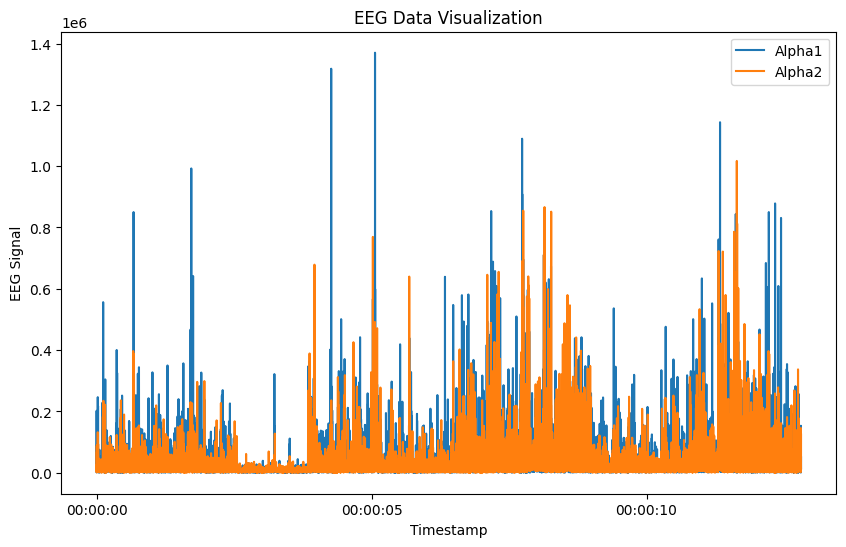

In [21]:
# Visualisasi data EEG
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Alpha1'], label='Alpha1')
plt.plot(data['Timestamp'], data['Alpha2'], label='Alpha2')
# Tambahkan konfigurasi visualisasi lainnya sesuai kebutuhan
plt.xlabel('Timestamp')
plt.ylabel('EEG Signal')
plt.title('EEG Data Visualization')
plt.legend()
plt.show()

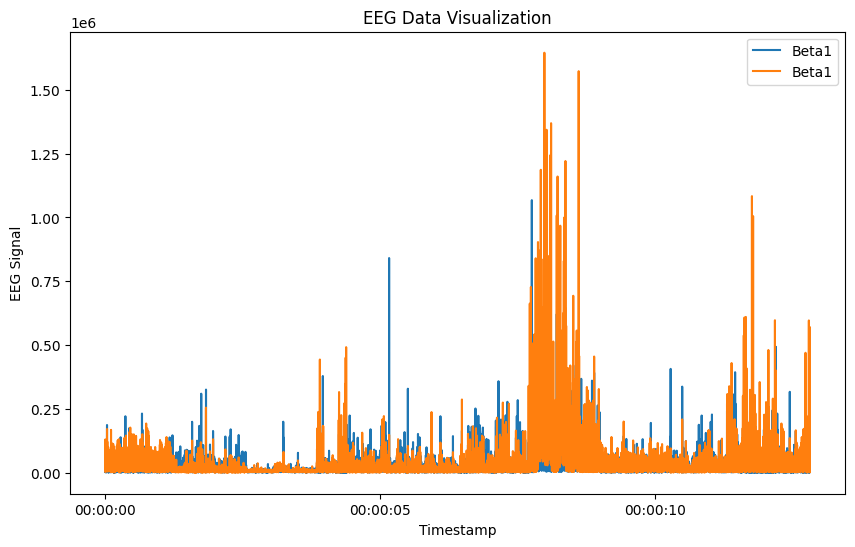

In [22]:
# Visualisasi data EEG
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Beta1'], label='Beta1')
plt.plot(data['Timestamp'], data['Beta2'], label='Beta1')
# Tambahkan konfigurasi visualisasi lainnya sesuai kebutuhan
plt.xlabel('Timestamp')
plt.ylabel('EEG Signal')
plt.title('EEG Data Visualization')
plt.legend()
plt.show()

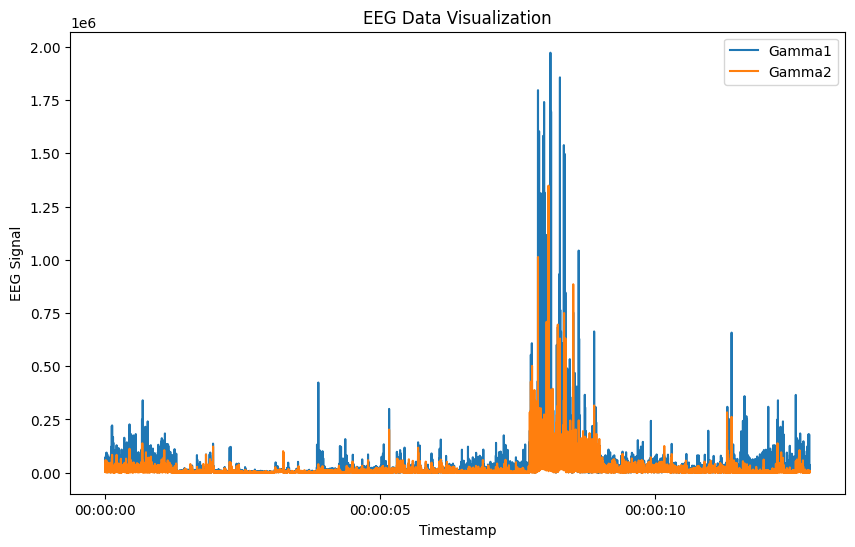

In [23]:
# Visualisasi data EEG
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Gamma1'], label='Gamma1')
plt.plot(data['Timestamp'], data['Gamma2'], label='Gamma2')
# Tambahkan konfigurasi visualisasi lainnya sesuai kebutuhan
plt.xlabel('Timestamp')
plt.ylabel('EEG Signal')
plt.title('EEG Data Visualization')
plt.legend()
plt.show()

In [24]:
# Inisialisasi solusi
def init_solution(x_min, x_max, n_particles):
    solutions = np.random.uniform(x_min, x_max, (n_particles, 2))
    return solutions

# Pilih solusi optimal
def choose_best_solution(solutions):
    best_solution = solutions[np.argmax(solutions[:, 0])]
    return best_solution

# Latih model SVM dengan solusi optimal
def train_model(best_solution, X_train, y_train):
    model = SVC(C=best_solution[0], gamma=best_solution[1])
    model.fit(X_train, y_train)
    return model

In [ ]:
# Evaluasi model
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Akurasi:", accuracy)

if __name__ == "__main__":
    main()

In [26]:
def evaluate_features(features, X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train[:, features], y_train)
    y_pred = clf.predict(X_test[:, features])
    return accuracy_score(y_test, y_pred)

In [27]:
class Particle:
    def __init__(self, num_features):
        self.position = np.array([np.random.choice([0, 1]) for _ in range(num_features)])
        self.velocity = np.array([np.random.uniform(-1, 1) for _ in range(num_features)])
        self.best_position = self.position.copy()
        self.best_value = float('-inf')

    def update_position(self):
        self.position += self.velocity
        self.position = np.clip(self.position, 0, 1)

    def evaluate(self, func, X_train, X_test, y_train, y_test):
        value = func(self.position, X_train, X_test, y_train, y_test)
        if value > self.best_value:
            self.best_value = value
            self.best_position = self.position.copy()

class ParticleSwarmOptimization:
    def __init__(self, num_particles, max_iter, num_features):
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.num_features = num_features
        self.global_best = np.zeros(num_features)
        self.particles = [Particle(num_features) for _ in range(num_particles)]

    def optimize(self, func, X_train, X_test, y_train, y_test):
        for _ in range(self.max_iter):
            for particle in self.particles:
                particle.evaluate(func, X_train, X_test, y_train, y_test)
                if particle.best_value > func(self.global_best, X_train, X_test, y_train, y_test):
                    self.global_best = particle.best_position.copy()

                inertia = 0.5
                cognitive = 0.5
                social = 0.5
                r1 = np.random.random(self.num_features)
                r2 = np.random.random(self.num_features)
                particle.velocity = (inertia * particle.velocity) + \
                                    (cognitive * r1 * (particle.best_position - particle.position)) + \
                                    (social * r2 * (self.global_best - particle.position))
                particle.update_position()

        return self.global_best.astype(bool)


In [52]:
accuracy = accuracy_score(y_pred, y_train)
print("Akurasi:", accuracy)

Akurasi: 85.8876%
